In [1]:
import geopandas as gpd
import pandas as pd
import os, sys
from functions import * 

# This is a Jupyter Notebook extension which reloads all of the modules whenever you run the code
# This is optional but good if you are modifying and testing source code
%load_ext autoreload
%autoreload 2

sys.path.append("../")
import GOSTnets as gn

#gpd.options.use_pygeos = True

The load_osm module is an optional GOSTNets submodule that is used to import OSM data. Make sure gdal, geopy, and boltons are installed first as it has additional dependencies (look in GOSTnets repo main README file if you need additional help with this). Then import the submodule.

In [2]:
from GOSTnets.load_osm import *

In [3]:
!#wget -O "./data/osm_extracts/phl.osm.pbf" "https://download.geofabrik.de/asia/philippines-latest.osm.pbf"

In [4]:
!#wget -O "./data/osm_extracts/idn.osm.pbf" "https://download.geofabrik.de/asia/indonesia-latest.osm.pbf"


In [11]:
# Read bounds
#bounds = gpd.read_file("./data/regions_all.geojson").to_crs({'init':'epsg:4326'})

bounds = unpickle_data("./data/bounds.pickle")

Unpickled data at ./data/bounds.pickle: 
 Rows: (4, 3);


In [12]:
bounds.head()

,ADM1_EN,ADM0_EN,geometry
0,Papua,Indonesia,"MULTIPOLYGON (((138.92583 -8.32361, 138.92639 ..."
1,Jawa Timur,Indonesia,"MULTIPOLYGON (((114.02917 -8.64806, 114.02917 ..."
2,Autonomous Region in Muslim Mindanao,Philippines (the),"MULTIPOLYGON (((119.46876 4.59360, 119.46881 4..."
3,National Capital Region,Philippines (the),"POLYGON ((121.03842 14.78525, 121.03876 14.785..."


In [9]:
bounds_str = {}
for idx, row in bounds.iterrows():
    bounds_str[row['ADM1_EN']] = ",".join([str(b) for b in row['geometry'].bounds])

bounds_str

{'Papua': '134.20524597167991,-9.118332862854004,141.0117645263672,-0.206099003553391',
 'Jawa Timur': '110.89834594726562,-8.780645370483342,116.27079010009766,-5.042778015136719',
 'Autonomous Region in Muslim Mindanao': '118.064236348,4.587294497000073,125.00774339400004,8.163486510000041',
 'National Capital Region': '120.90639543200007,14.351729568000053,121.13503641400007,14.785291728000061'}

In [13]:
papua_bounds = bounds_str['Papua']
jawa_bounds = bounds_str['Jawa Timur']
armm_bounds = bounds_str['Autonomous Region in Muslim Mindanao']
ncr_bounds = bounds_str['National Capital Region']

In [ ]:
#ncr_bounds.geometry.bounds
#minx, miny, maxx, maxy
#ncr_bounds_str = ",".join([str(b) for b in ncr_bounds.geometry.bounds])

In [20]:
#ncr_bounds.geometry.bounds
#minx, miny, maxx, maxy
#ncr_bounds_str = ",".join([str(b) for b in ncr_bounds.geometry.bounds])

In [14]:
# Generates bounds that only cover manila for the network
!osmconvert ./data/osm_extracts/idn.osm.pbf \
-b=$papua_bounds \
-o="./data/osm_extracts/idn.papua.osm.pbf"


In [15]:
# Generates bounds that only cover manila for the network
!osmconvert ./data/osm_extracts/idn.osm.pbf \
-b=$jawa_bounds \
-o="./data/osm_extracts/idn.jawa.osm.pbf"


In [22]:
# Generates bounds that only cover manila for the network
!osmconvert ./data/osm_extracts/phl.osm.pbf \
-b=$ncr_bounds \
-o="./data/osm_extracts/phl.ncr.osm.pbf"


In [16]:
# Generates bounds that only cover ARMM for the network
!osmconvert ./data/osm_extracts/phl.osm.pbf \
-b=$armm_bounds \
-o="./data/osm_extracts/phl.armm.osm.pbf"


In [17]:
papua = OSM_to_network("./data/osm_extracts/idn.papua.osm.pbf")

/home/mrmaksim/.local/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [18]:
jawa = OSM_to_network("./data/osm_extracts/idn.jawa.osm.pbf")

In [31]:
ncr = OSM_to_network("./data/osm_extracts/phl.ncr.osm.pbf")

/home/mrmaksim/.local/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [19]:
armm = OSM_to_network("./data/osm_extracts/phl.armm.osm.pbf")

In [20]:
def build_net(osm_net, output_file):
    # More comprehensive;  Later
    acceptable_roads = [
        "residential",
        "service",
        "track",
        "path",
        "footway",
        "tertiary",
        "secondary",
        "primary",
        "trunk",
        "living_street",
        "steps",
        "road",
        "motorway",
        "motorway_link",
        "trunk_link",
        "pedestrian",
        "primary_link",
        "tertiary_link",
        "secondary_link",
        "corridor",
        "cycleway",
        "raceway",
        "alley",
        "trail",
    ]

    osm_net.filterRoads(acceptedRoads = acceptable_roads)
    print(osm_net.roads_raw.infra_type.value_counts())
    
    osm_net.generateRoadsGDF(verbose = True)
    
    osm_net.initialReadIn()
    
    gn.save(osm_net.network, output_file,"./data/networks/")
    



In [21]:
build_net(papua, "papua_unclean_1")

residential       19819
service            5494
path               3186
unclassified       2638
footway            2617
track              2259
tertiary           1476
primary            1311
secondary          1196
secondary_link       91
primary_link         79
tertiary_link        43
pedestrian           13
road                 13
steps                 9
living_street         5
Name: infra_type, dtype: int64
Processing 0 of 40249
Processing 1000 of 40249
Processing 2000 of 40249
Processing 3000 of 40249
Processing 4000 of 40249
Processing 5000 of 40249
Processing 6000 of 40249
Processing 7000 of 40249
Processing 8000 of 40249
Processing 9000 of 40249
Processing 10000 of 40249
Processing 11000 of 40249
Processing 12000 of 40249
Processing 13000 of 40249
Processing 14000 of 40249
Processing 15000 of 40249
Processing 16000 of 40249
Processing 17000 of 40249
Processing 18000 of 40249
Processing 19000 of 40249
Processing 20000 of 40249
Processing 21000 of 40249
Processing 22000 of 40249


/home/mrmaksim/.local/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [ ]:
build_net(jawa, "jawa_unclean_1")

residential       750196
service            68786
unclassified       29212
track              20348
tertiary           19030
path               10333
secondary           6503
trunk               4296
living_street       4094
primary             3470
footway             2040
motorway            1281
trunk_link           714
motorway_link        697
secondary_link       433
primary_link         363
tertiary_link        321
steps                316
pedestrian           140
cycleway              57
raceway                6
road                   3
bridleway              3
corridor               1
Name: infra_type, dtype: int64
Processing 0 of 922643
Processing 1000 of 922643
Processing 2000 of 922643
Processing 3000 of 922643
Processing 4000 of 922643
Processing 5000 of 922643
Processing 6000 of 922643
Processing 7000 of 922643
Processing 8000 of 922643
Processing 9000 of 922643
Processing 10000 of 922643
Processing 11000 of 922643
Processing 12000 of 922643
Processing 13000 of 922643
Proc

In [32]:
ncr.roads_raw.head()

,osm_id,infra_type,geometry
0,267,tertiary,"LINESTRING (121.05200 14.65032, 121.05358 14.6..."
1,2667097,primary,"LINESTRING (120.99704 14.55475, 120.99701 14.5..."
2,2667099,trunk,"LINESTRING (120.98539 14.60454, 120.98545 14.6..."
3,2667105,residential,"LINESTRING (120.99380 14.54125, 120.99496 14.5..."
4,2667111,trunk,"LINESTRING (120.98020 14.59280, 120.98016 14.5..."


In [33]:
#https://wiki.openstreetmap.org/wiki/Key:highway
ncr.roads_raw.infra_type.value_counts()

residential       56039
service           21601
footway           10651
tertiary           4376
secondary          3779
unclassified       3522
primary            2455
trunk              1692
path               1387
steps              1172
trunk_link          657
living_street       566
motorway            473
motorway_link       467
track               372
pedestrian          321
primary_link        264
construction        243
secondary_link      211
proposed            123
corridor            104
tertiary_link       101
cycleway             76
road                 75
platform             18
bridleway             6
disused               3
raceway               3
services              2
escape                2
rest_area             1
traffic_island        1
elevator              1
yes                   1
bus_stop              1
Name: infra_type, dtype: int64

In [34]:
# More comprehensive;  Later
acceptable_roads = [
    "residential",
    "service",
    "track",
    "unclassified",
    "path",
    "footway",
    "tertiary",
    "secondary",
    "primary",
    "trunk",
    "living_street",
    "steps",
    "road",
    "motorway",
    "motorway_link",
    "trunk_link",
    "pedestrian",
    "primary_link",
    "tertiary_link",
    "secondary_link",
    "corridor",
    "cycleway",
    "raceway",
    "bridleway",#horses
    "alley",
    "trail",
    "abandoned"
]

# For now;
#acceptable_roads = ['residential', 'unclassified', 'track','service','tertiary','road','secondary','primary','trunk','primary_link','trunk_link','tertiary_link','secondary_link']


    
ncr.filterRoads(acceptedRoads = acceptable_roads)
ncr.roads_raw.infra_type.value_counts()


residential       56039
service           21601
footway           10651
tertiary           4376
secondary          3779
unclassified       3522
primary            2455
trunk              1692
path               1387
steps              1172
trunk_link          657
living_street       566
motorway            473
motorway_link       467
track               372
pedestrian          321
primary_link        264
secondary_link      211
corridor            104
tertiary_link       101
cycleway             76
road                 75
bridleway             6
raceway               3
Name: infra_type, dtype: int64

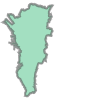

In [35]:
ncr_clip_geo = ncr_bounds.geometry
ncr_clip_geo

We check to see everything lines up by running intersect and counting the True / False returns. The count of the True values are the number of roads that intersect the AOI

In [29]:
# intersects is a Shapely function that returns True if the boundary or interior of the object intersect in any way with those of the other
#ncr.roads_raw.geometry.intersects(ncr_clip_geo).value_counts()

In [30]:
#ncr.roads_raw = ncr.roads_raw.loc[
#    ncr.roads_raw.geometry.intersects(ncr_clip_geo) == True]

#ncr.roads_raw.infra_type.value_counts()



KeyboardInterrupt: 

Having narrowed the DataFrame to the roads we are interested in, we generate the RoadsGPD object, which is stored as a property of the 'OSM_to_network' object. The RoadsGPD object is a GeoDataFrame that further processes the roads. This includes splitting the edges where intersections occur, adding unique edge IDs, and adding to/from columns to the GeoDataFrame.

In [36]:
ncr.generateRoadsGDF(verbose = True)

Processing 0 of 110370
Processing 1000 of 110370
Processing 2000 of 110370
Processing 3000 of 110370
Processing 4000 of 110370
Processing 5000 of 110370
Processing 6000 of 110370
Processing 7000 of 110370
Processing 8000 of 110370
Processing 9000 of 110370
Processing 10000 of 110370
Processing 11000 of 110370
Processing 12000 of 110370
Processing 13000 of 110370
Processing 14000 of 110370
Processing 15000 of 110370
Processing 16000 of 110370
Processing 17000 of 110370
Processing 18000 of 110370
Processing 19000 of 110370
Processing 20000 of 110370
Processing 21000 of 110370
Processing 22000 of 110370
Processing 23000 of 110370
Processing 24000 of 110370
Processing 25000 of 110370
Processing 26000 of 110370
Processing 27000 of 110370
Processing 28000 of 110370
Processing 29000 of 110370
Processing 30000 of 110370
Processing 31000 of 110370
Processing 32000 of 110370
Processing 33000 of 110370
Processing 34000 of 110370
Processing 35000 of 110370
Processing 36000 of 110370
Processing 370

/home/mrmaksim/.local/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [37]:
ncr.initialReadIn()

We save this graph object down to file using gn.save(). The save function produces three outputs: a node GeoDataFrame as a CSV, an edge GeoDataFrame as a CSV, and a graph object saved as a pickle.

In [ ]:
gn.save?

In [38]:
gn.save(ncr.network,'ncr_unclean_1',"./data/networks/")

/home/mrmaksim/.local/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


## Part 2: Clean Network

In [1]:
import os, sys
import time
import networkx as nx

# add to your system path the location of the LoadOSM.py and GOSTnet.py scripts
sys.path.append("../")
import GOSTnets as gn

G = nx.read_gpickle("./data/networks/ncr_unclean.pickle")

In [2]:
# inspect the graph
nodes = list(G.nodes(data=True))
edges = list(G.edges(data=True))
print(len(nodes))
print(nodes[0])
print(len(edges))
print(edges[0])

108975
(0, {'x': 121.034262, 'y': 14.6761831})
144865
(1, 50961, {'Wkt': <shapely.geometry.linestring.LineString object at 0x7f40a8366100>, 'id': 29383, 'infra_type': 'residential', 'osm_id': '27264156', 'key': 'edge_29383', 'length': 0.017977943751159194})


In [3]:
# you can also print general graph information with networkx
print(nx.info(G))

Name: 
Type: MultiDiGraph
Number of nodes: 108975
Number of edges: 144865
Average in degree:   1.3293
Average out degree:   1.3293


In [4]:
# To become familiar with the function read the doc string
gn.clean_network?

Signature:
gn.clean_network(
    G,
    wpath='',
    output_file_name='',
    UTM={'init': 'epsg:3857'},
    WGS={'init': 'epsg:4326'},
    junctdist=50,
    verbose=False,
)
Docstring:
Topologically simplifies an input graph object by collapsing junctions and removing interstital nodes
:param G: a graph object containing nodes and edges. Edges should have a property called 'Wkt' containing geometry objects describing the roads.
:param wpath: the write path - a drive directory for inputs and output
:param output_file_name: This will be the output file name with '_processed' appended
:param UTM: The epsg code of the projection, in metres, to apply the junctdist
:param WGS: the current crs of the graph's geometry properties. By default, assumes WGS 84 (epsg 4326)
:param junctdist: distance within which to collapse neighboring nodes. simplifies junctions. Set to 0.1 if not simplification desired. 50m good for national (primary / secondary) networks
:param verbose: if True, saves down int

In [5]:
PHL_UTMZ = {'init': 'epsg:3857'} #TODO - figure this out

WGS = {'init': 'epsg:4326'} # do not adjust. OSM natively comes in ESPG 4326

In [6]:
print('start: %s\n' % time.ctime())
#G_clean = gn.clean_network(G, UTM = PHL_UTMZ, WGS = {'init': 'epsg:4326'}, junctdist = 10, verbose = False)

# using verbose = True:
G_clean = gn.clean_network(G, wpath = "./data", output_file_name = 'ncr_network', UTM = PHL_UTMZ, WGS = {'init': 'epsg:4326'}, junctdist = 10, verbose = True)
print('\nend: %s' % time.ctime())
print('\n--- processing complete')

start: Fri Jul 17 15:34:40 2020



/home/mrmaksim/Code/healthcare-accessibility-proj/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/mrmaksim/Code/healthcare-accessibility-proj/venv/lib/python3.8/site-packages/GOSTnets/core.py:1175: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  juncs_gdf_unproj['centroid'] = juncs_gdf_unproj.centroid
/home/mrmaksim/Code/healthcare-accessibility-proj/venv/lib/python3.8/site-packages/GOSTnets/core.py:1176: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one 

125006
243301


/home/mrmaksim/Code/healthcare-accessibility-proj/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


113330
221007
Edge reduction: 144865 to 221007 (-52 percent)

end: Fri Jul 17 16:40:05 2020

--- processing complete


In [7]:
# let's print info on our clean version
print(nx.info(G_clean))

Name: 
Type: MultiDiGraph
Number of nodes: 76543
Number of edges: 221007
Average in degree:   2.8874
Average out degree:   2.8874


In [9]:
gn.save(G_clean, "ncr_network_clean", "./data")